<a href="https://colab.research.google.com/github/Jeevesh8/FireFighter-RL/blob/main/fire_fighter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main

In [1]:
!git clone https://github.com/Jeevesh8/FireFighter-RL

Cloning into 'FireFighter-RL'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 193 (delta 116), reused 68 (delta 34), pack-reused 0
Receiving objects: 100% (193/193), 42.84 KiB | 1.78 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [2]:
%cd FireFighter-RL/
!pip install -r requirements.txt

/content/FireFighter-RL


In [3]:
%matplotlib inline

Found new state:  (array([False,  True, False, False, False, False, False, False, False]), array([False, False, False, False, False, False, False, False, False]))
All possible actions:  [array([False, False,  True, False,  True, False, False, False, False]), array([ True, False, False, False,  True, False, False, False, False]), array([ True, False,  True, False, False, False, False, False, False])]
	Found new state:  (array([False,  True, False, False, False, False, False, False, False]), array([False, False,  True, False,  True, False, False, False, False]))
	All possible actions:  [array([ True, False, False, False, False, False, False, False, False])]
		Found new state:  (array([False,  True, False, False, False, False, False, False, False]), array([ True, False,  True, False,  True, False, False, False, False]))
		Encountered last state!! (array([False,  True, False, False, False, False, False, False, False]), array([ True, False,  True, False,  True, False, False, False, False]))

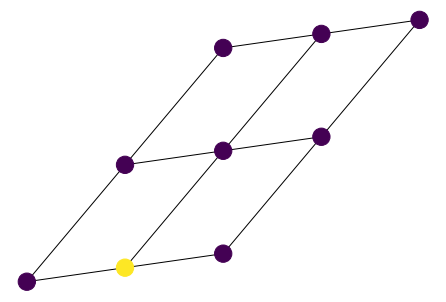

State visualized after defending: 


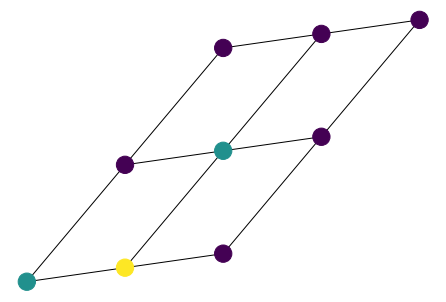

In the state:  (array([False,  True, False, False, False, False, False, False, False]), array([False, False,  True, False,  True, False, False, False, False]))  defend :  [ True False False False False False False False False]
Visualized state: 


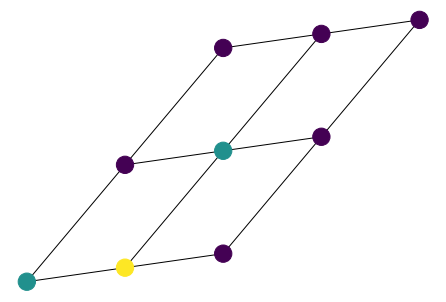

State visualized after defending: 


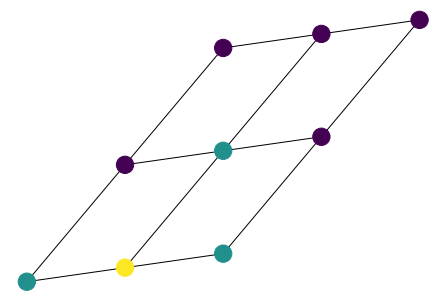

In the state:  (array([False,  True, False, False, False, False, False, False, False]), array([ True, False,  True, False,  True, False, False, False, False]))  defend :  [False False False False False False False False False]
Visualized state: 


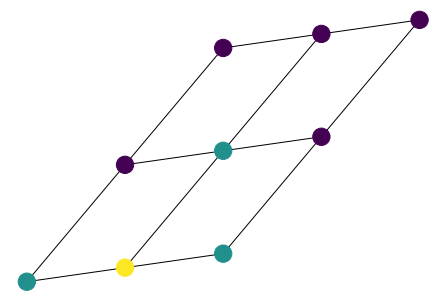

State visualized after defending: 


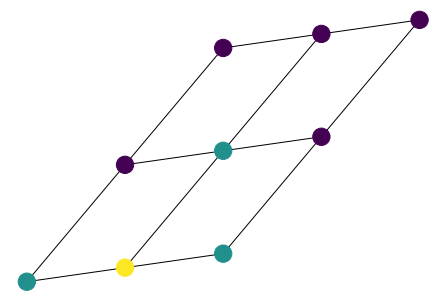

In the state:  (array([ True,  True, False, False, False, False, False, False, False]), array([False, False,  True, False,  True, False, False, False, False]))  defend :  [False False False  True False False False False False]
Visualized state: 


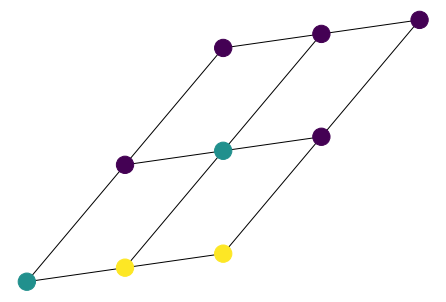

State visualized after defending: 


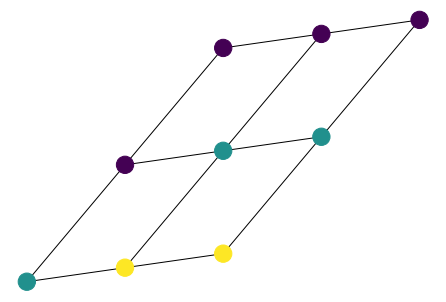

In the state:  (array([ True,  True, False, False, False, False, False, False, False]), array([False, False,  True,  True,  True, False, False, False, False]))  defend :  [False False False False False False False False False]
Visualized state: 


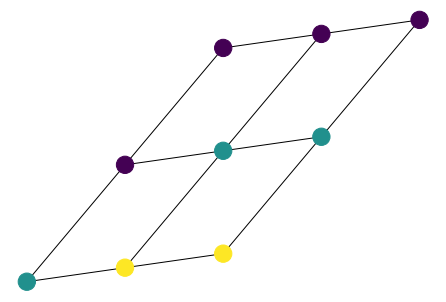

State visualized after defending: 


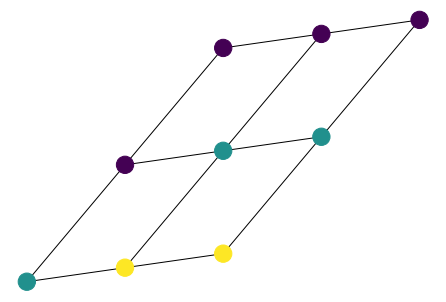

<Figure size 432x288 with 0 Axes>

In [4]:
%run dp.py --write_file 'value_policy.pkl'

# Now irrelevant Try-outs

## Testing

### Hashing numpy arrays

In [ ]:
import numpy as np
from functools import reduce
def hash_bool_array(arr):
    """Hashes a boolean ndarray.
    Flattens and converts to boolean list.

    Returns:
        A tuple: (boolean list, shape of original array)
    """
    return tuple(np.packbits(np.reshape(arr, (-1)))), arr.shape

def revert_hash(hash):
    """Computes the array given the hash.
    Inverse of the function ``hash_bool_array``.

    Returns:
        np.ndarray, whose hash is the one provided as argument.
    """
    total_size = reduce(lambda x,y: x*y, hash[1])
    return np.reshape( np.unpackbits(np.array(hash[0]))[:total_size], hash[1])

In [ ]:
x = np.array([[True]*6, [False]*6])
revert_hash(hash_bool_array(x))

array([[1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

### Dictionary with keys as numpy arrays

In [ ]:
class agent_policy(dict):
    def __init__(self, *args, **kwargs):
        super(bool).__init__(*args, **kwargs)

    def __getitem__(self, burned_n_defended):
        burned, defended = burned_n_defended
        return super().__getitem__((hash_bool_array(burned), hash_bool_array(defended)))
    
    def __setitem__(self, burned_n_defended, value):
        burned, defended = burned_n_defended
        return super().__setitem__((hash_bool_array(burned), hash_bool_array(defended)), value)

In [ ]:
policy = agent_policy()
x = np.array([True, True])
y = np.array([False, False])
policy[x] = y

In [ ]:
print(policy[x])

[False False]


### Plotting Graphs

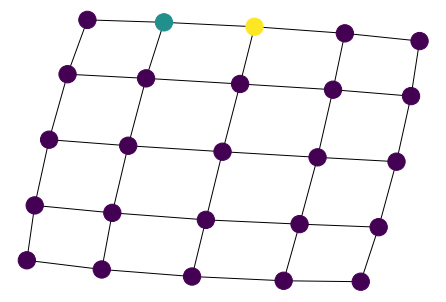

In [ ]:
import networkx as nx
from networkx import grid_graph, to_numpy_matrix
import numpy as np
g = nx.convert_matrix.from_numpy_matrix(to_numpy_matrix(grid_graph(dim=(5,5))))
burned = np.asarray([False, False, True]+[False]*22, dtype=np.bool)
defended = np.asarray([False, True, False]+[False]*22, dtype=np.bool)
node_color = np.where(burned, 1.0, 0.2)
node_color = np.where(defended, 0.6, node_color)
nx.draw(g, node_color=node_color.tolist())

In [ ]:
import numpy as np
from networkx import grid_graph, to_numpy_matrix

config = {
    'adj_mat' : to_numpy_matrix(grid_graph(dim=(10,10)), dtype=np.bool),
    'initial_fire' : np.asarray([False, False, True]+[False]*97, dtype=np.bool),
    'burn_prob': 0.5,
    'n_defend': 2,
}

In [ ]:
np.squeeze(, axis=0).shape #reshape((100,)).shape

(1, 100)

In [ ]:
mat = np.any(config['adj_mat'][config['initial_fire']], axis=0)

In [ ]:
mat.shape

(1, 100)

In [ ]:
np.squeeze(mat)

matrix([[False,  True, False,  True, False, False, False, False, False,
         False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False]])